In [39]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten , Dropout 



In [4]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data() 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
X_train.shape  # 6000 28x28 images 

(60000, 28, 28)

In [10]:
# how to view that train_image 
img = X_train[0]
from PIL import Image 

pil_img = Image.fromarray(img)
display(pil_img)


In [11]:
y_train[0]

5

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
X_train = X_train/ 255
X_test =X_test/ 255


In [33]:
model = Sequential() 

In [34]:
# we have the each image of dimensioon of 28x28 but the neural network input needs 786 so what we do now is flatten those 2d array and pass to the input layer 
model.add(Flatten(input_shape= (28,28))) # converts the image to 1d 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))  
""" 
Here, after the first dense layer with 128 neurons, a dropout layer with a dropout rate of 0.2 is added. This means during training, 20% of the inputs to this layer will be randomly set to zero.
Similarly, after the third dense layer with 64 neurons, another dropout layer with a dropout rate of 0.4 is added. This time, during training, 40% of the inputs to this layer will be
randomly set to zero.
"""


c:\Users\sapko\miniconda3\envs\100days\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


To learn more about dropout use this link : https://dotnettutorials.net/lesson/dropout-layer-in-cnn/

# Softmax Function 
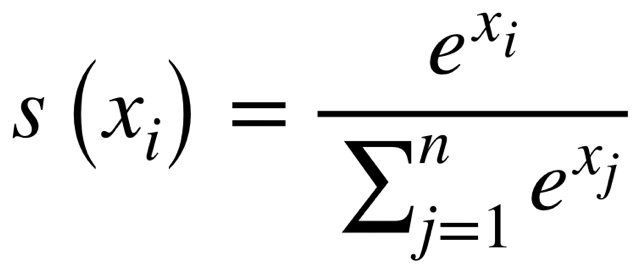

In [35]:
# what the softmax function gives is the class probabilities and among those we choose the index of the maximum probablities and that is the predicted value 

In [36]:
model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam', metrics= ['accuracy']) # sparse for the non one hot encoded labels 
from keras.callbacks import EarlyStopping 

early_stop = EarlyStopping(monitor='val_loss', patience=5) # it will check for the next 5 epochs if the val_loss doesn't decrease it will stop the training 

In [38]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks = [early_stop]) # 20% rows will be used for validation 

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4772 - loss: 1.4730 - val_accuracy: 0.8435 - val_loss: 0.5316
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8505 - loss: 0.5058 - val_accuracy: 0.8911 - val_loss: 0.3882
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8950 - loss: 0.3685 - val_accuracy: 0.9220 - val_loss: 0.2768
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9218 - loss: 0.2721 - val_accuracy: 0.9339 - val_loss: 0.2342
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9361 - loss: 0.2219 - val_accuracy: 0.9438 - val_loss: 0.1981
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9457 - loss: 0.1865 - val_accuracy: 0.9505 - val_loss: 0.1791
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9525 - loss: 0.1614 - val_accuracy: 0.9513 - val_loss: 0.1726
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9587 - loss: 0.1425 - 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt 
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\sapko\OneDrive\Documents\Learning\100 Days of Deep Learning\Day8\try4_loss.png")

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig(r"C:\Users\sapko\OneDrive\Documents\Learning\100 Days of Deep Learning\Day8\try4_train_val_curve.png")
